In [2]:
import pandas as pd

In [3]:
etablissement=pd.read_csv('Déchets 2016/etablissements.csv')

In [4]:
emission=pd.read_csv('Déchets 2016/emissions.csv',decimal='.')

In [5]:
d16= pd.merge(left=etablissement, right=emission, left_on='Identifiant', right_on='Identifiant')

In [6]:
d16=d16[['Coordonnees_X','Coordonnees_Y','Polluant','quantite']]

In [7]:
d16.head()

,Coordonnees_X,Coordonnees_Y,Polluant,quantite
0,762639.0,1873015.0,Demande biologique en oxygène (DBO5),94700.0
1,762639.0,1873015.0,Demande chimique en oxygène (DCO),189000.0
2,548100.0,2637000.0,Demande biologique en oxygène (DBO5),64800.0
3,805789.0,2028946.0,Composés organiques volatils non méthaniques (...,34000.0
4,805789.0,2028946.0,Méthane (CH4),232000.0


In [8]:
from pyproj import Proj, transform

In [9]:
long, lat =transform(Proj(init='epsg:2192'), Proj(init='epsg:4326'), d16.Coordonnees_X.values, d16.Coordonnees_Y.values)
d16['LLX']=long
d16['LLY']=lat

In [10]:
d16.head()

,Coordonnees_X,Coordonnees_Y,Polluant,quantite,LLX,LLY
0,762639.0,1873015.0,Demande biologique en oxygène (DBO5),94700.0,4.356168,43.839050
1,762639.0,1873015.0,Demande chimique en oxygène (DCO),189000.0,4.356168,43.839050
2,548100.0,2637000.0,Demande biologique en oxygène (DBO5),64800.0,1.602574,50.723851
3,805789.0,2028946.0,Composés organiques volatils non méthaniques (...,34000.0,4.956297,45.229284
4,805789.0,2028946.0,Méthane (CH4),232000.0,4.956297,45.229284


In [12]:
import matplotlib.pyplot as plt

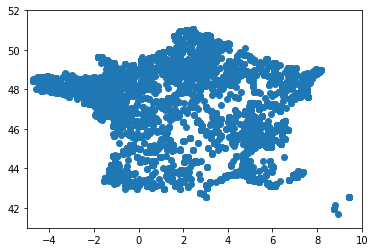

In [13]:
plt.scatter(d16.LLX,d16.LLY)
plt.xlim((-5,10))
plt.ylim((41,52))
plt.show()